Ana Lyons
101

# Homework 7: Numerical Differentiation, Integration, Root Finding

##### ** Submit this notebook to bCourses to receive a credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_Home07.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Numerical integration [Ayars 2.2]

Compare results of the trapezoid integration method,  Simpson’s method, and the adaptive Gaussian quadrature method for the following integrals:

1. $$\int_0^{\pi/2}\cos x\, dx $$
1. $$\int_1^3 \frac{1}{x^2}\, dx $$
1. $$\int_2^4 (x^2+x+1)\, dx$$
1. $$\int_0^{6.9}\cos\left(\frac{\pi}{2}x^2\right)\, dx$$

For each part, try it with more and with fewer slices to determine how many slices are required to give an ‘acceptable’ answer. (If you double the number of slices and still get the same answer, then try half as many, etc.) Parts (3) and (4) are particularly interesting in this regard. In your submitted work, describe roughly how many points were required, and explain.

In [51]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

#cosx
print("cos(x) from 0 to pi/2")
def func(x):
    return np.cos(x)

n=40
x = np.linspace(0, np.pi*0.5, n)
y = func(x)

quad_ans = sc.integrate.quad(func, 0, np.pi*0.5)
trapz_ans = sc.integrate.trapz(y, x)
simps_ans = sc.integrate.simps(y, x)

print('Quadrature: {}\nTrapezoid: {}\nSimpson: {}'.format(quad_ans[0], trapz_ans, simps_ans))
print('''Very few slices were needed to get very close to the actual answer, only around 5. 
Adding more slices didn't change the precision very quickly.\n''')

#1/x^2 from 1 to 3
print('1/x^2 from 1 to 3')
def func(x):
    return 1/(x**2)

n=120
x = np.linspace(1, 3, n)
y = func(x)

quad_ans = sc.integrate.quad(func, 1, 3)
trapz_ans = sc.integrate.trapz(y, x)
simps_ans = sc.integrate.simps(y, x)

print('Quadrature: {}\nTrapezoid: {}\nSimpson: {}'.format(quad_ans[0], trapz_ans, simps_ans))
print('''Less slices were needed to get an acceptable answer with Simpsons Method, only around 35-40. 
More were needed to get to the same precision with the trapezoidal method, around 120.\n''' )

#x^2+x+1 from 2 to 4
print('x^2+x+1 from 2 to 4')
def func(x):
    return x**2 + x + 1

n=50
x = np.linspace(2, 4, n)
y = func(x)

quad_ans = sc.integrate.quad(func, 2, 4)
trapz_ans = sc.integrate.trapz(y, x)
simps_ans = sc.integrate.simps(y, x)

print('Quadrature: {}\nTrapezoid: {}\nSimpson: {}'.format(quad_ans[0], trapz_ans, simps_ans))
print('''Around 25 slices were needed to get a reasonable answer from the trapezoidal method.
The simpson method bounced back and forth in precision, starting out very close to the actual value with
only 5 slices, and getting less precise with more slices, and then getting more precise with even more
slices, around 50.\n''')

#cos(pi/2*x^2) from 0 to 6.9
print('cos(pi/2*x^2) from 0 to 6.9')
def func(x):
    return np.cos(np.pi*0.5*x**2)

n=95
x = np.linspace(0, 6.9, n)
y = func(x)

quad_ans = sc.integrate.quad(func, 0, 6.9)
trapz_ans = sc.integrate.trapz(y, x)
simps_ans = sc.integrate.simps(y, x)

print('Quadrature: {}\nTrapezoid: {}\nSimpson: {}'.format(quad_ans[0], trapz_ans, simps_ans))
print('''It took longer to reach a good precision with this function. Very small numbers of slices gave 
very different answers than the quadrature method, and they varied a lot until larger numbers of slices, 
around 95.''')


cos(x) from 0 to pi/2
Quadrature: 0.9999999999999999
Trapezoid: 0.9998648110993812
Simpson: 0.9999972377492226
Very few slices were needed to get very close to the actual answer, only around 5. 
Adding more slices didn't change the precision very quickly.

1/x^2 from 1 to 3
Quadrature: 0.6666666666666667
Trapezoid: 0.6667119980563353
Simpson: 0.6666678395646843
Less slices were needed to get an acceptable answer with Simpsons Method, only around 35-40. 
More were needed to get to the same precision with the trapezoidal method, around 120.

x^2+x+1 from 2 to 4
Quadrature: 26.666666666666664
Trapezoid: 26.66722199083715
Simpson: 26.666677999813004
Around 25 slices were needed to get a reasonable answer from the trapezoidal method.
The simpson method bounced back and forth in precision, starting out very close to the actual value with
only 5 slices, and getting less precise with more slices, and then getting more precise with even more
slices, around 50.

cos(pi/2*x^2) from 0 to 6.9
Quadr

## Problem 2: Numerical differentiation [Ayars 2.8]

Write a function that, given a list of abscissa values $x_i$ and function values $f_i(x_i)$, returns a list of values of the second derivative $f''(x_i)$ of the function. Test your function by giving it a list of known function values for $\sin(x)$ and making a graph of the differences between the output of the function and $−\sin(x)$. Compare your output to Python's *scipy.misc.derivative*


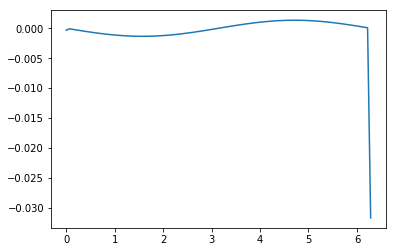

In [66]:
def second_derivative(x, y):
    '''Given an array/list of x values and f(x) values, returns a list of second derivative values. 
    Uses centered derivative method twice.
    Inputs: 2 arrays of same dimension
    Output: array of same dimension as inputs'''
    #first derivative
    dyc = [0.0]*len(x)
    dyc[0] = (y[1] - y[0])/(x[1] - x[0])
    for i in range(1, len(y)-1):
        dyc[i] = (y[i+1] - y[i-1])/(x[i+1] - x[i-1])
    dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    
    #second derivative (repeat process above but y=dyc)
    dyc2 = [0.0]*len(x)
    dyc2[0] = (dyc[1] - dyc[0])/(x[1] - x[0])
    for i in range(0, len(dyc)-1):
        dyc2[i] = (dyc[i+1] - dyc[i-1])/(x[i+1] - x[i-1])
    dyc2[-1] = (dyc[-1] - dyc[-2])/(x[-1] - x[-2])
    
    return dyc2
    
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
dyc2 = second_derivative(x, y)

diff = -np.sin(x)-dyc2
plt.plot(x, diff)
    
    

## Problem 3: Root Finding [Newman 6.16]

There is a magical point between the Earth and the Moon, called the
$L_1$ Lagrange point, at which a satellite will orbit the Earth in perfect
synchrony with the Moon, staying always in between the two.  This works
because the inward pull of the Earth and the outward pull of the Moon
combine to create exactly the needed centripetal force that keeps the
satellite in its orbit. See Fig. 6.16 on p.274 of Newman. 

You may derive in 5A (or look up in a textbook) that assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, that the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$
{GM\over r^2} - {Gm\over(R-r)^2} = \omega^2 r
$$
where $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's
gravitational constant, and $\omega$ is the angular velocity of both the
Moon and the satellite.

The equation above is a fifth-order polynomial equation in $r$ (also called a quintic equation). Such equations cannot be solved exactly in closed form, but it's straightforward to solve them numerically.  Write a program to solve for the distance $r$ from the Earth to the $L_1$ point.  Compute a solution accurate to at least four significant figures.

The values of the various parameters are:

G = 6.674e-11 m^3 kg^-1 s^-2<br>
M = 5.974e24 kg<br>
m = 7.348e22 kg<br>
R = 3.844e8 m<br>
$\omega$ = 2.662e-6 s^-1.<br>

You will also need to choose a suitable starting value for $r$, or two
starting values if you use the secant method.


In [17]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

#defining constants
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
omega = 2.662e-6

#defining the function whos solution gives location of L1
def L(r):
    return (G*M/r**2)-(G*m/(R-r)**2)-(omega**2*r)

#initial guess and solution
r0 = 2e8
L1 = fsolve(L, r0)

print('Estimate of the distance from Earth to L1 point: {:.0f} m ({:.0f} km)'.format(L1[0], L1[0]/1000))

Estimate of the distance from Earth to L1 point: 326045072 m (326045 km)
